## What are the peak and low season months for EV sales based on the data from 2022 to 2024? 

Here how you can solve it

---

1. Load the data
2. Convert the datetime into pandas datetime
3. Aggregate sales by month
4. Find peak month by getting the max sales of that month and opposite for low_month

In [5]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as ex
from IPython.display import display

In [14]:
# Loading the ev_sales dataset
ev_sales = pd.read_csv("../../data/processed/ev_sales_by_state_enhanced_20250806.csv")

display(ev_sales.head(1))
display(ev_sales.columns)

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,2021-04-01,2021,4,2,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,0.0


Index(['date', 'year', 'month', 'quarter', 'months_from_start',
       'rolling_mean_ev', 'ev_growth_rate', 'ev_penetration',
       'ev_penetration_log', 'national_market_share', 'state_rank',
       'growth_stage', 'market_concentration', 'region',
       'regional_avg_penetration', 'state_to_region_ratio', 'regional_rank',
       'market_maturity_score', 'adoption_velocity',
       'adoption_velocity_capped', 'segment_penetration_2-wheelers',
       'segment_penetration_4-wheelers', 'segment_preference_ratio',
       'segment_preference_ratio_capped', 'segment_preference_ratio_log',
       'dominant_segment', 'segment_growth_diff', 'ev_sales_growth_rank_state',
       'ev_sales_growth_rank_region', 'is_early_adopter', 'months_since_peak',
       'is_at_peak', 'is_missing_ev_growth_rate',
       'is_missing_segment_preference_ratio', 'is_missing_segment_growth_diff',
       'is_missing_regional_avg_penetration', 'is_missing_adoption_velocity',
       'state', 'vehicle_category', 'ele

In [7]:
# convert datetime into pandas datetime
ev_sales["date"] = pd.to_datetime(ev_sales["date"], errors="coerce")
ev_sales["month_name"] = ev_sales["date"].dt.month_name()

# Create fiscal year column (fiscal year starts in April)
ev_sales["fiscal_year"] = np.where(
    ev_sales["month"] >= 4, ev_sales["year"], ev_sales["year"] - 1
)

# Filter for fiscal years 2022-2024
ev_sales = ev_sales[ev_sales["fiscal_year"].between(2022, 2024)]

In [8]:
# Aggregate month of ev_sales by sales
"""
We want total sales per month across all years (or average per month):
"""

monthly_sales = (
    ev_sales.groupby(["month", "month_name"])["electric_vehicles_sold"]
    .sum()
    .reset_index()
    .sort_values(by="month", ascending=True)
)

display(monthly_sales)

,month,month_name,electric_vehicles_sold
0,1,January,157427
1,2,February,159878
2,3,March,233469
3,4,April,128342
4,5,May,158370
5,6,June,101222
6,7,July,111632
7,8,August,124808
8,9,September,126621
9,10,October,162995


In [9]:
# find peaks and lowld season months

peak_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmax(), 'month_name']
low_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmin(), 'month_name']

print(f"Peak month for EV sales: {peak_month}")
print(f"Low month for EV sales: {low_month}")

Peak month for EV sales: March
Low month for EV sales: June


/tmp/ipykernel_234842/1779725159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month_name", y="electric_vehicles_sold", data=monthly_sales, palette="viridis")


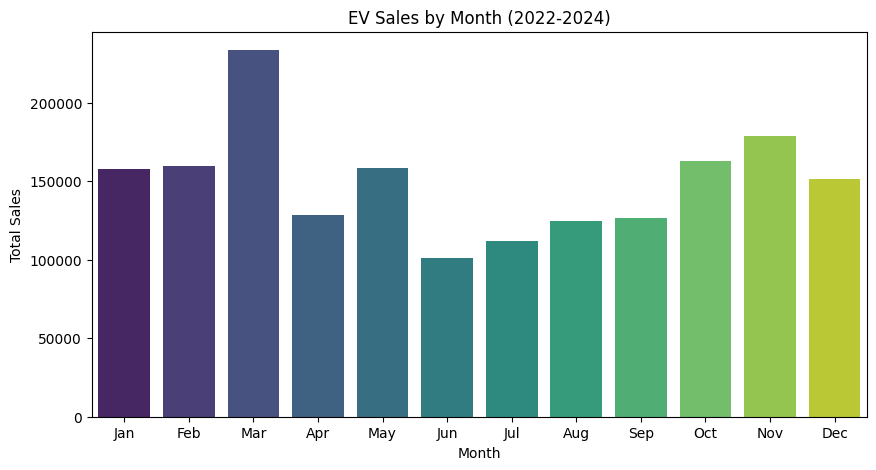

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x="month_name", y="electric_vehicles_sold", data=monthly_sales, palette="viridis")

plt.title("EV Sales by Month (2022-2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(
    range(0, 12),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.show()

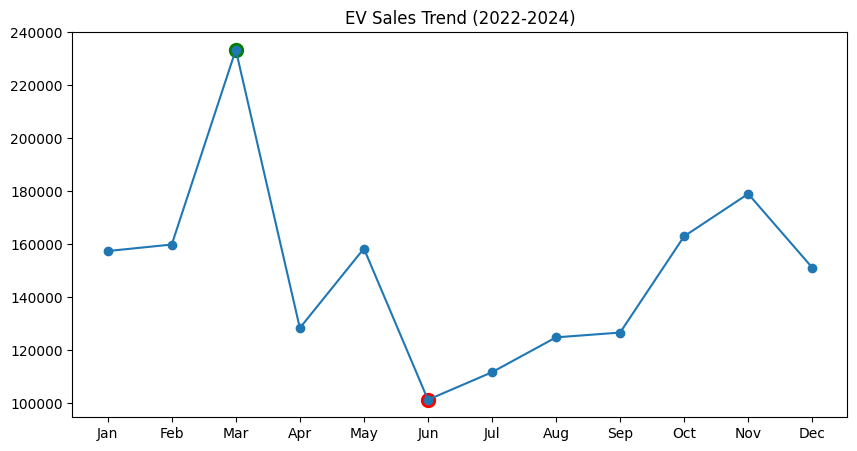

In [11]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month_name'], monthly_sales['electric_vehicles_sold'], marker='o')
plt.scatter(peak_month, monthly_sales.loc[monthly_sales['month_name']==peak_month, 'electric_vehicles_sold'], color='green', s=100)
plt.scatter(low_month, monthly_sales.loc[monthly_sales['month_name']==low_month, 'electric_vehicles_sold'], color='red', s=100)
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('EV Sales Trend (2022-2024)')
plt.show()


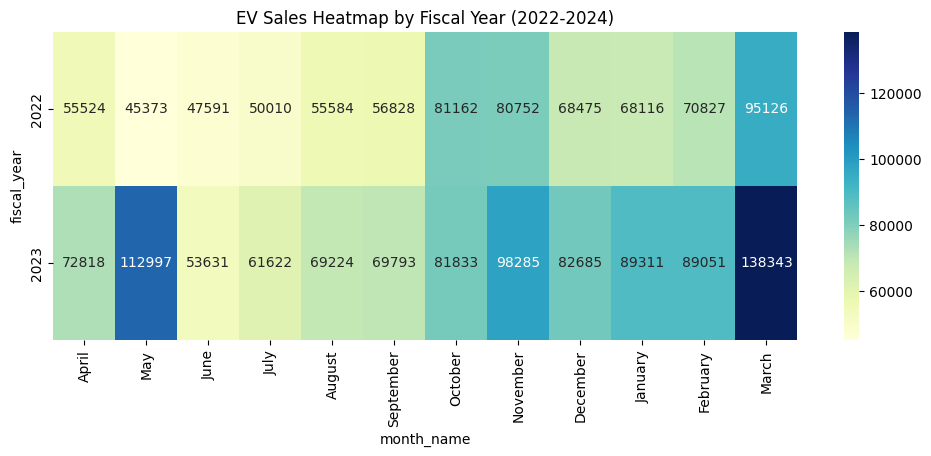

In [12]:
# First create a yearly monthly sales DataFrame with fiscal year
ev_sales["fiscal_year"] = np.where(
    ev_sales["month"] >= 4, ev_sales["year"], ev_sales["year"] - 1
)

yearly_monthly_sales = (
    ev_sales[ev_sales["fiscal_year"].between(2022, 2024)]
    .groupby(["fiscal_year", "month_name"])["electric_vehicles_sold"]
    .sum()
    .reset_index()
)

# Create the pivot table
sales_pivot = yearly_monthly_sales.pivot(
    index="fiscal_year", columns="month_name", values="electric_vehicles_sold"
)

# Reorder columns to show months in chronological order (starting from April)
fiscal_month_order = [
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
    "January",
    "February",
    "March",
]
sales_pivot = sales_pivot[fiscal_month_order]

# Create the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("EV Sales Heatmap by Fiscal Year (2022-2024)")
plt.show()